<a href="https://colab.research.google.com/github/KamblePranay/D-L-2-to-4-PM-/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression with keras

Reading Dataset/importing dataset

In [4]:
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


the goal is to predicting the power plant energy output(PE)

Setp-2 performing basic data quality check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
df.duplicated().sum()

41

In [10]:
df.duplicated().sum()/len(df)

0.004285117056856187


setp-3 seprating the input and output
> Add blockquote



In [11]:
x = df.drop(labels='PE',axis=1)
y = df[['PE']]

In [12]:
y

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [13]:
x

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


Step 4: Create a Preprocessing Pipeline for X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(x)
X_pre.head()


,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


Step 5: Apply train test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, y, test_size=0.2, random_state=42)

In [18]:
xtrain.head()


,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [19]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [20]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [21]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [22]:
xtrain.shape[1]

4

### Step 5: Build the Keras neural network
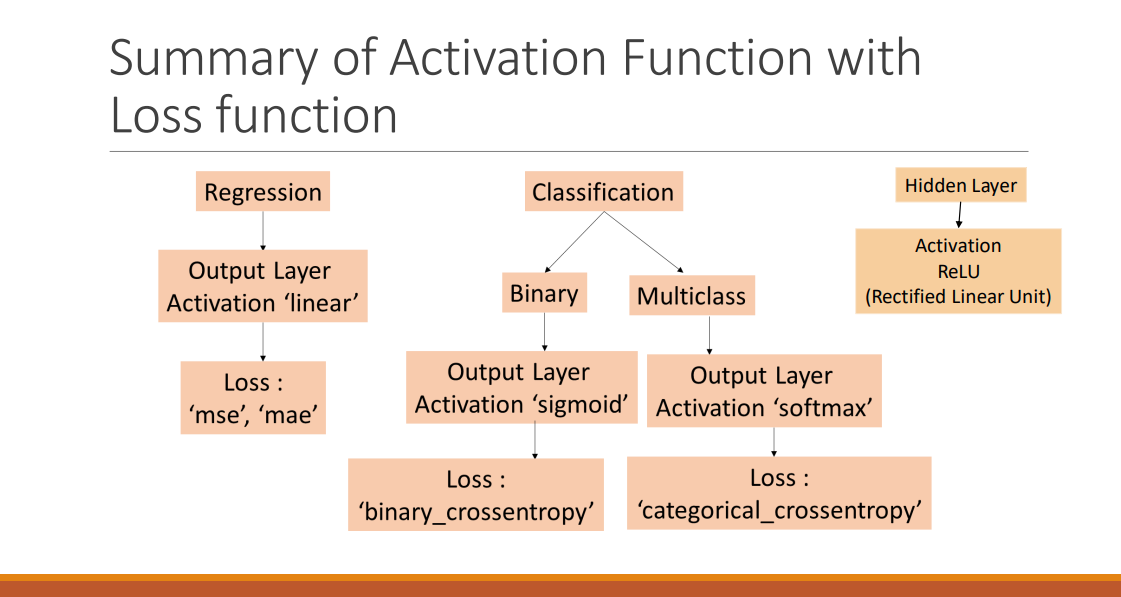

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [24]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [27]:
hist = model.fit(xtrain, ytrain, validation_split=0.2,epochs =100)

Epoch 1/100
192/192 [==============================] - 1s 3ms/step - loss: 206357.0469 - mae: 453.9427 - val_loss: 204664.1406 - val_mae: 452.0868
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 203386.9219 - mae: 450.7024 - val_loss: 199941.0938 - val_mae: 446.9144
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 194954.0938 - mae: 441.3514 - val_loss: 186908.8438 - val_mae: 432.2175
Epoch 4/100
192/192 [==============================] - 0s 3ms/step - loss: 175134.8906 - mae: 418.0425 - val_loss: 160420.4844 - val_mae: 399.5722
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 142451.4844 - mae: 374.0440 - val_loss: 124694.5547 - val_mae: 346.3912
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 107124.0625 - mae: 313.4879 - val_loss: 93372.6875 - val_mae: 283.2932
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 80951.8438 - mae: 256.5956 - val_loss: 73298

### Evaluvate model

In [28]:
model.evaluate(xtrain,ytrain)

240/240 [==============================] - 0s 2ms/step - loss: 19.4830 - mae: 3.4849


[19.48298454284668, 3.4848580360412598]

In [29]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 1ms/step - loss: 18.1781 - mae: 3.3852


[18.178050994873047, 3.385172128677368]

In [31]:
hist.history['loss']

[206357.046875,
 203386.921875,
 194954.09375,
 175134.890625,
 142451.484375,
 107124.0625,
 80951.84375,
 64590.734375,
 51969.109375,
 40078.375,
 28945.529296875,
 19338.00390625,
 11950.83203125,
 7328.208984375,
 5052.1826171875,
 3860.092041015625,
 3096.7275390625,
 2553.69921875,
 2149.5810546875,
 1839.7628173828125,
 1484.4071044921875,
 1140.447021484375,
 871.008056640625,
 665.4539184570312,
 509.93212890625,
 395.278076171875,
 311.1321716308594,
 250.6609649658203,
 206.73912048339844,
 174.8716583251953,
 151.0686492919922,
 132.5184326171875,
 117.35883331298828,
 104.91815948486328,
 94.18608093261719,
 85.01835632324219,
 76.98043060302734,
 69.97606658935547,
 63.8652229309082,
 58.498291015625,
 53.84895706176758,
 49.709659576416016,
 46.35493087768555,
 42.96524429321289,
 39.98308181762695,
 37.32241439819336,
 35.21098327636719,
 33.425323486328125,
 31.56243896484375,
 29.8637638092041,
 28.51229476928711,
 27.258638381958008,
 26.172222137451172,
 25.3088550

In [35]:
hist.history['val_mae']

[452.0868225097656,
 446.9144287109375,
 432.2174987792969,
 399.57220458984375,
 346.39117431640625,
 283.2931823730469,
 240.16159057617188,
 216.07931518554688,
 192.573486328125,
 165.45887756347656,
 135.31365966796875,
 104.66020202636719,
 78.8808822631836,
 62.98307800292969,
 54.070343017578125,
 47.814979553222656,
 42.9522819519043,
 39.08598709106445,
 36.03168487548828,
 33.1056022644043,
 28.886425018310547,
 24.918596267700195,
 21.360797882080078,
 18.189359664916992,
 15.504107475280762,
 13.197409629821777,
 11.493608474731445,
 10.108416557312012,
 9.143865585327148,
 8.430706977844238,
 7.875002384185791,
 7.327747821807861,
 6.940459251403809,
 6.581263065338135,
 6.329162120819092,
 5.9794416427612305,
 5.67205810546875,
 5.437509536743164,
 5.429732322692871,
 5.080198764801025,
 4.9012885093688965,
 4.864264011383057,
 4.616219997406006,
 4.540730953216553,
 4.4058146476745605,
 4.293351650238037,
 4.224564552307129,
 4.130221843719482,
 4.009983539581299,
 3.96

### plot the learning curve

In [36]:
import matplotlib.pyplot as plt

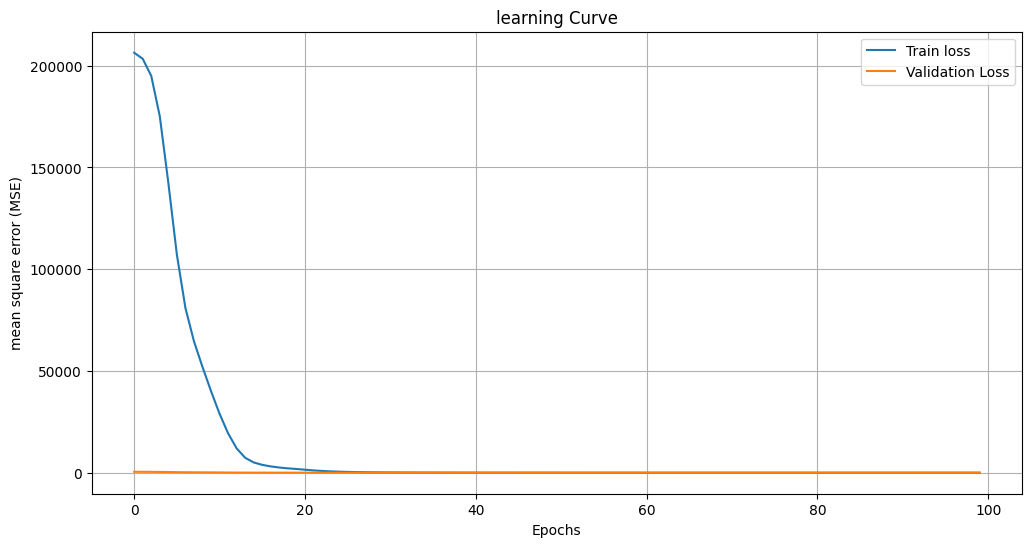

In [37]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_mae'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('mean square error (MSE)')
plt.title('learning Curve')
plt.legend()
plt.grid()
plt.show()

### predict the results for train and test

In [38]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 3ms/step


In [39]:
ypred_train[0:5]

array([[441.3757 ],
       [435.11108],
       [434.465  ],
       [428.66666],
       [432.3323 ]], dtype=float32)

In [40]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [41]:
ypred_test[0:5]

array([[436.53354],
       [436.41   ],
       [457.72473],
       [475.31686],
       [436.60117]], dtype=float32)

In [42]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### perform detailed evaluation

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
from sklearn.metrics import r2_score

In [50]:
def evaluate_model(model, X, Y):
  ypred = model.predict(x)
  mse = mean_squared_error(y,ypred)
  rmse=mse**(1/2)
  mae=mean_absolute_error(y,ypred)
  r2 = r2_score(y,ypred)
  print(f'mean squared error:{mse:2f}')
  print(f'root mean squared error : {rmse : 2f}')
  print(f'R2 score :{r2:.4f}')

In [51]:
evaluate_model(model, xtrain, ytrain)

299/299 [==============================] - 1s 2ms/step
mean squared error:1421156565.470743
root mean squared error :  37698.230270
R2 score :-4879475.1090


In [52]:
evaluate_model(model, xtest, ytest)

299/299 [==============================] - 1s 2ms/step
mean squared error:1421156565.470743
root mean squared error :  37698.230270
R2 score :-4879475.1090


r2 scpre on test is 0.9336>0.8 hence above model is very good

Saving above model

In [53]:
model.save('PowerOutput.keras')

In [56]:
from keras.models import load_model

In [57]:
m = load_model('/content/PowerOutput.keras')

In [59]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.31066597, -0.665911  , -0.06560862, -0.6823676 ,  0.11421826,
          2.4178112 ,  0.12808472,  2.9242344 ],
        [ 0.194663  , -0.8233362 ,  0.6566498 , -0.6789284 ,  0.47325572,
          2.787381  , -0.00760388,  2.9799542 ],
        [ 1.2418758 , -0.08903448,  0.7808451 , -0.34745663, -0.55373365,
         -1.7243901 , -0.9755637 , -1.8078396 ],
        [ 0.57230455, -1.159734  , -0.5676535 , -0.21441732,  0.3571574 ,
         -1.021215  ,  1.0690169 , -1.1418133 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([4.1202345, 3.9532518, 3.4606378, 3.9507074, 3.4438083, 3.2927284,
        3.862662 , 3.5785878], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 2.5173197 , -0.19774477,  2.6468108 , -0.8211273 ],
        [ 3.0621133 , -0.738315  ,  2.95171   , -0.428939  ],
        [ 2.56706   ,  0.502124  ,  3.4568143 , 